#CPSC 483 - Project 4
##Winston Do
This project imported California housing data from a database and sliced 80% of the data to be used as training and the rest as testing. 
The data consited of 8 features with our desired output being the median house price. In all, a total of five models were trained using sklearn.linear_model.LinearRegression. 

The dataset was of the dataframe type, which utilized the pandas module.

The first model only utilized one of the features (average number of bedrooms) to train a linear model. The model resulted in a poor fit with both **coefficient of determination** (R2) and **mean square error** (MSE) values being low and high respectively. This was counter intuitive, as common sense would suggest that the number of bedrooms would correlate highly with the price of a house.

Using pandas.plotting.scatter_matrix(), scatter plots of all features were compared with the other features. From the scatter plots matrix, it was estimated that the "longitude" feature would have a higher correlation with the target values. Using pandas.DataFrame.corr, a correlation matrix was created to confirm this estimation. Intuitively, this makes sense. High priced homes tend to cluster within certain cities, especially in California, so a correlation between the price of a house and its longitude location would be very possible.

Another single feature linear regression model (SFLR) was trained using the "longitude" feature. However, this too yielded a poor fit; again with low R2 and high MSE values.

It is possible that there could be an implementation error when training these SFLR models.

A multi-feature linear regression (MFLR) was trained with all 8 features. This model yielded significnatly better results with reguards to R2 and MSE when compared to the two SFLR models above. The MFLR resulted in a slight underfit. The R2 values of both the training and test data for the MFLR were significantly better, meaning that all 8 features together correlate linearly with the price of a house.

The forth model trained used the MFLR and the fit_transform() method to create a degree-2 polynominal model. This model yielded similar results to the MFLR model but it slighly overfit the data. Considering the bias-variance balance,  the MFLR model seems to be slightly superior to the degree-2 polynominal model as the training and test loss are closer together.

The final model trained was a regularlized degree-2 polynominal model with the lamda value being set at 1. These resulting in slightly higher MSE values but considerably lower R2 values for both testing and training data. It would not be recommonded to use regularization in this case, based on the current results.

In [112]:
#CPSC 483
#Project 4
#Winston Do

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import fetch_california_housing
#from sklearn.linear_model import LinearRegression
from sklearn import  linear_model
import sklearn.model_selection

def printShape(data):
  print(data.shape)

def printType(obj):
  print(type(obj))


dataset_cali = fetch_california_housing()


df_cali_features = pd.DataFrame(data=dataset_cali.data, columns=dataset_cali.feature_names)

df_cali_target = pd.DataFrame(data=dataset_cali.target,columns=['MedHouseVal'])



feature_train_data, feature_test_data, target_train_data, target_test_data = sk.model_selection.train_test_split(df_cali_features, df_cali_target, test_size = 0.2, train_size = 0.8, random_state=(2021-3-25))

x = feature_train_data['AveBedrms'] #get AveBedrms feature
print(target_train_data)

AveBedrms_test = feature_test_data['AveBedrms'].values.reshape(-1,1)
#printType(x)
AveBedrms = x.values.reshape(-1, 1) 

AveBedrms_vs_MedHouseVal = sk.linear_model.LinearRegression().fit(AveBedrms, target_train_data)

train_predict_values = AveBedrms_vs_MedHouseVal.predict(AveBedrms)
train_avg_loss = sk.metrics.mean_squared_error(train_predict_values, target_train_data)
print("average loss for training data was:", train_avg_loss)

print("R2 of training linear model is:", AveBedrms_vs_MedHouseVal.score(AveBedrms, target_train_data))
print("R2 of test linear model is:", AveBedrms_vs_MedHouseVal.score(AveBedrms_test, target_test_data))



       MedHouseVal
5481       3.39000
14868      1.31300
11404      2.74200
10158      3.81500
4324       3.33900
...            ...
15664      5.00001
8541       2.36800
8417       1.52300
14009      4.11600
17825      2.57400

[16512 rows x 1 columns]
average loss for training data was: 1.3278477256171917
R2 of training linear model is: 0.0028776656256584987
R2 of test linear model is: -0.0010086368172135263


With the given R2 scores:

average loss for training data was: 1.3278477256171917

R2 of training linear model is: 0.0028776656256584987

R2 of test linear model is: -0.0010086368172135263

Our model seems to perform poorly at predicting the target values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a18695d0>,
      dtype=object)

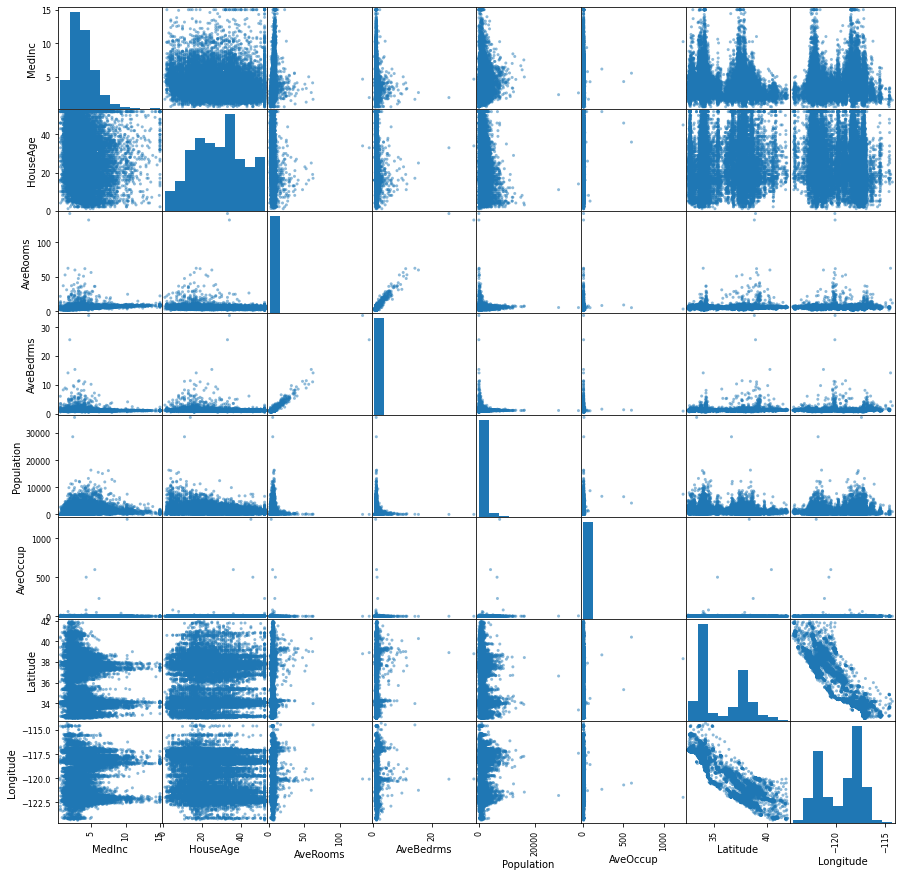

In [113]:
pd.plotting.scatter_matrix(df_cali_features,alpha=0.5, figsize=(15,15))

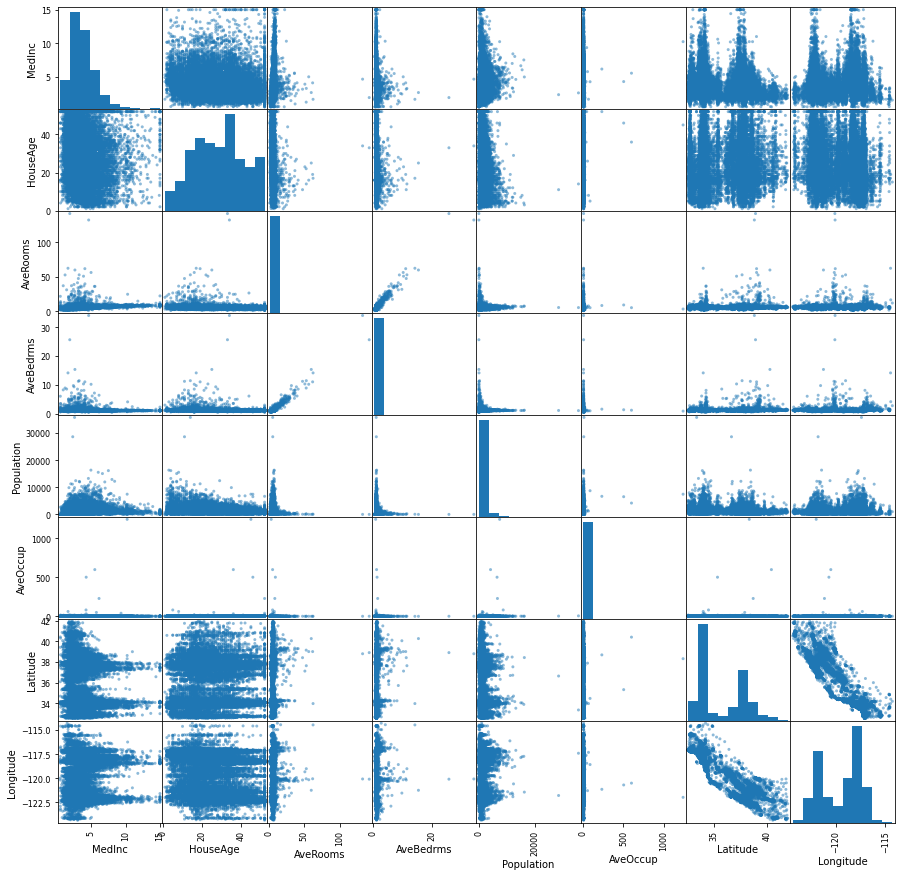

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9a1e93ed0>,
      dtype=object)

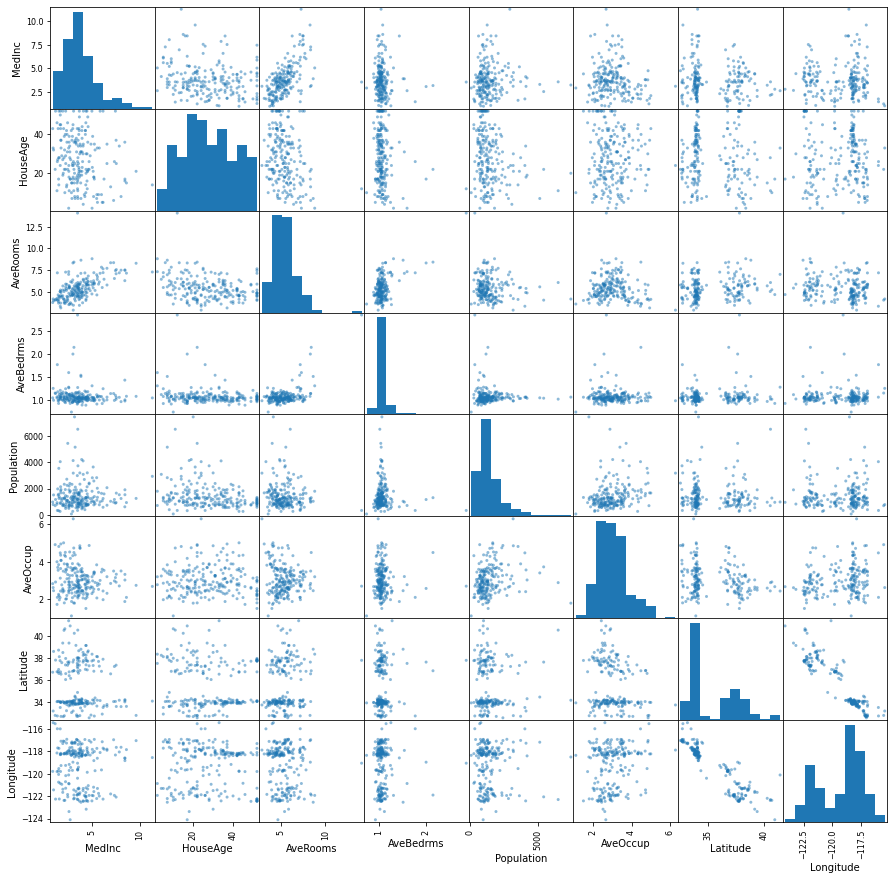

In [114]:
pd.plotting.scatter_matrix(df_cali_features.sample(frac=0.01),alpha=0.5, figsize=(15,15))

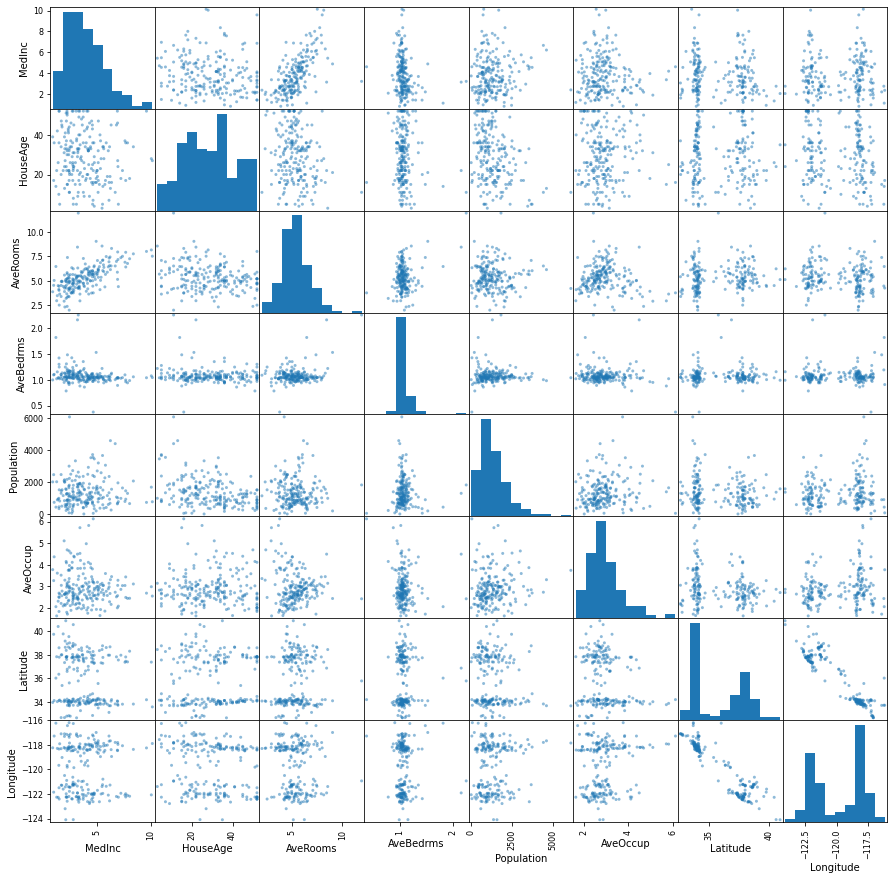

The features for long and latitude seem like they have the strongest linear releationship. If we were to use the latitude and longitude as coordinate points no a map, then it seems the most pensive houses are concentrated into areas with high housing pricies.

In [115]:
df_cali_features.corr(method='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


It seems as if longitude is a good predictor for the median value of a house. based on the correlation matrix.

In [116]:
Longitude = feature_train_data['Longitude'].values.reshape(-1,1) #get Longitude feature
Longitude_test = feature_test_data['Longitude'].values.reshape(-1,1)


Longitude_vs_MedHouseVal = sk.linear_model.LinearRegression().fit(Longitude, target_train_data)

train_predict_values = Longitude_vs_MedHouseVal.predict(Longitude)
train_avg_loss = sk.metrics.mean_squared_error(train_predict_values, target_train_data)
print("average loss for training data was:", train_avg_loss)

print("R2 of training linear model is:", Longitude_vs_MedHouseVal.score(Longitude, target_train_data))
print("R2 of test linear model is:", Longitude_vs_MedHouseVal.score(Longitude_test, target_test_data))

average loss for training data was: 1.329234573997782
R2 of training linear model is: 0.0018362378564957817
R2 of test linear model is: 0.0031712508831659436


average loss for training data was: 1.329234573997782

R2 of training linear model is: 0.0018362378564957817

R2 of test linear model is: 0.0031712508831659436

The R2 values don't seem to have changed much. They suggest that longitude is also a poor indicator of linearity. There could be a possible error within the implmeentation, but I am unable to find it. 


In [117]:
multiLR = sk.linear_model.LinearRegression().fit(feature_train_data, target_train_data)

train_predict_values = multiLR.predict(feature_train_data)
train_avg_loss = sk.metrics.mean_squared_error(train_predict_values, target_train_data)
print("average loss for training data was:", train_avg_loss)

#test data
test_predict_values = multiLR.predict(feature_test_data)
test_avg_loss = sk.metrics.mean_squared_error(test_predict_values, target_test_data)
print("average loss for test data was:", test_avg_loss)

print("R2 of training linear model is:", multiLR.score(feature_train_data, target_train_data))
print("R2 of test linear model is:", multiLR.score(feature_test_data, target_test_data))

average loss for training data was: 0.5296444457890024
average loss for test data was: 0.5047767239631319
R2 of training linear model is: 0.6022734414610222
R2 of test linear model is: 0.6207624626635018


average loss for training data was: 0.5296444457890024

average loss for test data was: 0.5047767239631319

R2 of training linear model is: 0.6022734414610222

R2 of test linear model is: 0.6207624626635018

Using all eight features leads to a superior model. The linearity for both test and training data is much higher than using a single feature.

In [118]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(2)
X = poly.fit_transform(feature_train_data)
X_test = poly.fit_transform(feature_test_data)


#training a new polynominal model
PolyF_Model = sk.linear_model.LinearRegression().fit(X, target_train_data)


#training data
print("Average loss for training data was:", sk.metrics.mean_squared_error(PolyF_Model.predict(X), target_train_data))
print("R2 of training linear model is:", multiLR.score(feature_train_data, target_train_data))
print("\n")

#test data
print("Average loss for testing data was:", sk.metrics.mean_squared_error(PolyF_Model.predict(X_test), target_test_data))
print("R2 of test linear model is:", multiLR.score(feature_test_data, target_test_data))
print("\n")

Average loss for training data was: 0.4243322251744488
R2 of training linear model is: 0.6022734414610222


Average loss for testing data was: 0.6463802847593977
R2 of test linear model is: 0.6207624626635018




Utilizing a degree 2 polynominal model seems to have slightly overfit the data where as the original multi-feature regression model seems to have slightly underfit the data. 

Overall, if we wanted a bias-variance balance, then the multidimentional linear model seems to be slightly superior to the degree-2 polynominal model as the training and test loss are closer together. 

In [119]:



R = Ridge(alpha=1.0, fit_intercept=True, normalize=True, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
Regularized_Model = R.fit(feature_train_data, target_train_data)

#training data
print("Average loss for training data was:", sk.metrics.mean_squared_error(Regularized_Model.predict(feature_train_data), target_train_data))
print("R2 of training linear model is:", Regularized_Model.score(feature_train_data, target_train_data))
print("\n")

#test data
print("Average loss for testing data was:", sk.metrics.mean_squared_error(Regularized_Model.predict(feature_test_data), target_test_data))
print("R2 of test linear model is:", Regularized_Model.score(feature_test_data, target_test_data))
print("\n")

Average loss for training data was: 0.8126808589399824
R2 of training linear model is: 0.3897325577818585


Average loss for testing data was: 0.7903358889444773
R2 of test linear model is: 0.40622254956857473




When regularization is applied, it does **not** appear that the model performs better than the multi-feature linear regression. 